In [1]:
# Packages and libraries used in this program
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
print("Input data:", x)

Input data: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


In [3]:
# initialization
T_MAX = 10
R1 = 0
R2 = 100
C1 = 0.6
C2 = -0.4
X_MAX = 2

# size of the input dataset
N = x.shape[0]

np.set_printoptions(threshold=np.nan)

In [4]:
history = np.zeros((T_MAX, N))

x_old = np.copy(x)
#print("\r\n\r\nt:", 0)
#print("x:", np.around(x, 2))

history[0] = x[:]

for t in range(1, T_MAX):
    #print("\r\n\r\nt:", t)
    
    for i in range(N):
        
        # calculate neighborhood borders
        B1_BEGIN = i - R1
        if (B1_BEGIN < 0):
            B1_BEGIN = 0
        
        B1_END = i + R1
        if (B1_END > N - 1):
            B1_END = N - 1
            
        B2_BEGIN = i - R2
        if (B2_BEGIN < 0):
            B2_BEGIN = 0
        
        B2_END = i + R2
        if (B2_END > N - 1):
            B2_END = N - 1
            
        #print("Neighberhood R1", B1_BEGIN, B1_END)
        #print("Neighberhood R2", B2_BEGIN, B2_END)
        
        #create current weight matrix
        weight = np.zeros(N)
        for j in range(B2_BEGIN, B2_END + 1):
            weight[j] = C2
        for j in range(B1_BEGIN, B1_END + 1):
            weight[j] = C1
            
        #print("Weight matrix for i =", i)
        #print(weight)

        x[i] = np.dot(weight, x_old)
        
        #print(x[i])
        
    # apply activation function
    x = np.minimum(X_MAX, np.maximum(0, x))
    
    #print("x:", np.around(x, 2))
    history[t] = x[:]
    
    x_old = np.copy(x)



t: 0
x: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


t: 1
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 2
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 3
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 4
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 5
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 6
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 7
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 8
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


t: 9
x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


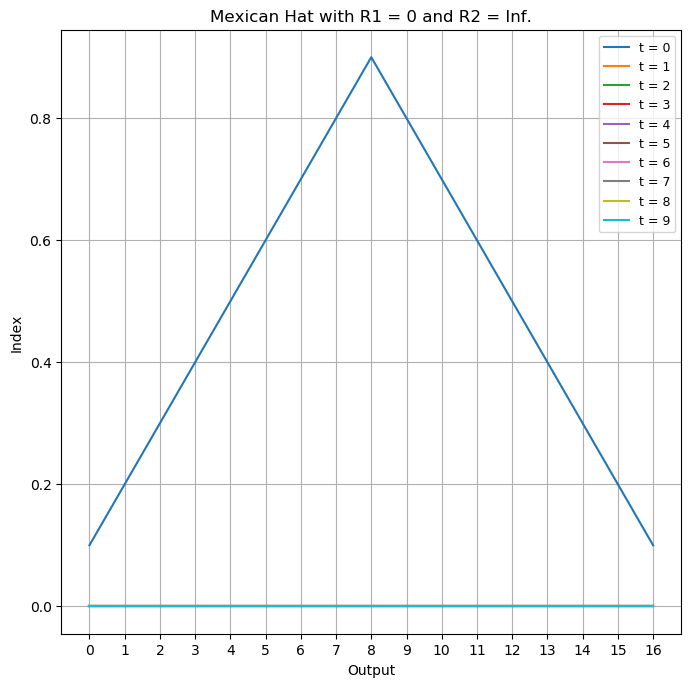

In [5]:
plt.figure(1, figsize=(8, 8), dpi=100)
plt.style.use(['default'])

for t in range(T_MAX):
    print("\r\n\r\nt:", t)
    print("x:", np.around(history[t], 2))
    plt.plot(range(N), history[t], linewidth=1.5, label='t = '+str(t))

plt.xticks(np.arange(N))
#plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
#plt.ylim(0, 1)
plt.xlabel('Output')
plt.ylabel('Index')
plt.title('Mexican Hat with R1 = 0 and R2 = Inf.')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()